In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle5 as pickle
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [42]:
with open('clean-boxofficemojo-daily_gross.pkl', "rb") as fh:
  dat = pickle.load(fh)


df = dat[['Date', 'Movie', 'Daily', 'Theaters', 'Avg',
       'To_Date', 'Days', 'Distributor', 'genre', 'Music',
       'Short', 'Family', 'Horror', 'Crime', 'Documentary', 'News', 'Musical',
       'History', 'Western', 'War', 'Comedy', 'Thriller', 'Action', 'Romance',
       'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy', 'Animation',
       'Mystery', 'Adventure', 'Film-Noir', 'Adult']]
df = df.dropna()
col = df.columns.tolist()

# mutiply genre by daily to dispay total revenue per genre 
for i in range(9, len(col)):
    df[col[i]] = df[col[i]]*df['Daily']
    
# This is the main raw DF
df

,Date,Movie,Daily,Theaters,Avg,To_Date,Days,Distributor,genre,Music,Short,Family,Horror,Crime,Documentary,News,Musical,History,Western,War,Comedy,Thriller,Action,Romance,Biography,Sport,Sci-Fi,Drama,Fantasy,Animation,Mystery,Adventure,Film-Noir,Adult
0,2015-01-01,The Hobbit: The Battle of the Five Armies,9320601,3875.0,2405.0,198869927.0,16.0,Warner Bros.,Adventure|Fantasy|,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9320601,0,0,9320601,0,0
1,2015-01-01,Into the Woods,8081110,2507.0,3223.0,72143214.0,8.0,Walt Disney Studios Motion Pictures,Adventure|Comedy|Drama|Fantasy|Musical|,0,0,0,0,0,0,0,8081110,0,0,0,8081110,0,0,0,0,0,0,8081110,8081110,0,0,8081110,0,0
2,2015-01-01,Unbroken,6953045,3167.0,2195.0,69481655.0,8.0,Universal Pictures,Action|Biography|Drama|Sport|War|,0,0,0,0,0,0,0,0,0,0,6953045,0,0,6953045,0,6953045,6953045,0,6953045,0,0,0,0,0,0
3,2015-01-01,Night at the Museum: Secret of the Tomb,5974323,3914.0,1526.0,75328905.0,14.0,Twentieth Century Fox,Adventure|Comedy|Family|Fantasy|,0,0,5974323,0,0,0,0,0,0,0,0,5974323,0,0,0,0,0,0,0,5974323,0,0,5974323,0,0
4,2015-01-01,Annie,4257057,3197.0,1331.0,61208977.0,14.0,Sony Pictures Entertainment (SPE),Comedy|Drama|Family|Musical|,0,0,4257057,0,0,0,0,4257057,0,0,0,4257057,0,0,0,0,0,0,4257057,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95948,2019-12-31,Hustlers,185,3.0,61.0,104960643.0,110.0,STX Entertainment,Comedy|Crime|Drama|,0,0,0,0,185,0,0,0,0,0,0,185,0,0,0,0,0,0,185,0,0,0,0,0,0
95949,2019-12-31,Midnight Family,134,2.0,67.0,15537.0,26.0,1091 Pictures,Action|Crime|Documentary|Drama|,0,0,0,0,134,134,0,0,0,0,0,0,0,134,0,0,0,0,134,0,0,0,0,0,0
95950,2019-12-31,Kind Hearts and Coronets2019 Re-release,108,1.0,108.0,27523.0,35.0,Rialto Pictures,Comedy|Crime|,0,0,0,0,108,0,0,0,0,0,0,108,0,0,0,0,0,0,0,0,0,0,0,0,0
95951,2019-12-31,Sympathy for the Devil,73,1.0,73.0,45927.0,33.0,-,War|,0,0,0,0,0,0,0,0,0,0,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# create month column and group movie data by month
df['Month'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))

df = df.groupby(['Month']).agg({'Music':'sum',
                             'Short':'sum',
                             'Family':'sum',
                             'Horror':'sum',
                             'Crime':'sum',
                             'Documentary':'sum',
                             'News':'sum',
                             'Musical':'sum',
                             'History':'sum',
                             'Western':'sum',
                             'War':'sum',
                             'Comedy':'sum',
                             'Thriller':'sum',
                             'Action':'sum',
                             'Romance':'sum',
                             'Biography':'sum',
                             'Sport':'sum',
                             'Sci-Fi':'sum',
                             'Drama':'sum',
                             'Fantasy':'sum',
                             'Animation':'sum',
                             'Mystery':'sum',
                             'Adventure':'sum',
                             'Film-Noir':'sum',
                             'Adult':'sum'}).round(2)
df

,Music,Short,Family,Horror,Crime,Documentary,News,Musical,History,Western,War,Comedy,Thriller,Action,Romance,Biography,Sport,Sci-Fi,Drama,Fantasy,Animation,Mystery,Adventure,Film-Noir,Adult
Month,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01,100133,184421,147664166,26149007,128172568,1427351,0,99391382,46149865,202313,340934489,277228969,236170777,437648575,40010722,416786042,51221965,60436613,599422647,229889962,79476683,24430758,306485156,0,0
2015-02,1159,225958,165612393,8478090,23401110,443213,0,6757431,7938838,20764,106600734,317883616,295058851,375663060,191051664,140976591,21521564,78949318,352752095,185757937,162163710,37755625,319404862,0,0
2015-03,417215,319151,244943697,22254918,143521226,595856,0,251500,1734157,0,22208364,269842448,240864736,239011408,256157240,45849876,21227379,205917698,341868239,245589331,89926719,25390737,234729437,0,0
2015-04,4750771,261289,181627844,36005673,103680241,11874095,0,18568,33521281,31540443,8988138,239292342,418681880,424271339,94639596,37470561,1888919,139811403,153497930,152888755,97270366,43149897,467535277,0,0
2015-05,148344017,283589,110568094,45282366,59902335,4855223,0,804,14530889,5543721,7080780,246693812,260164543,749052069,56317194,11904823,59245,641387382,93243586,111299195,17094382,70928978,709274838,0,0
2015-06,44392751,217866,251297017,58912266,17427184,305391,0,0,2486271,337702,15928007,437416154,182684741,784637762,20614106,12129683,0,603187653,296802811,233186824,205738057,78246175,923656279,0,0
2015-07,72051633,211639,433218665,25313337,310374873,3042611,0,0,912307,0,24729778,814950076,158478527,468455544,96785482,6138300,26359274,663619432,371040939,445540337,406283840,66549686,834873599,0,0
2015-08,162876889,184973,91882081,20310243,86003941,382722,0,0,135540579,0,1605194,331965709,240530827,409916346,45244429,136001372,23734219,205019620,308728551,122314677,89830056,74466984,451809387,0,0
2015-09,29943790,34958,85844974,122913338,69229119,534570,0,0,27702764,0,718740,182470612,271770710,193027262,7766796,129966484,4214233,90109737,242585117,91251957,84884969,74942990,274866797,0,0


In [44]:
# create new DF Genre that has all the info from the original df 
genre = df.reset_index()

# make month date time
genre['Month'] = pd.to_datetime(genre['Month'])

# read and display economic data
cp = pd.read_pickle('final-clean-consumer_prices.pkl')
we = pd.read_pickle('final-clean-weekly_earnings.pkl')
print(genre.columns)
print(cp.columns)
print(we.columns)
genre.dtypes


Index(['Month', 'Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult'],
      dtype='object')
Index(['Month', 'All items', 'Food', 'Food at home', 'Food away from home',
       'Energy', 'Electricity', 'Gasoline (all types)',
       'All items less food and energy', 'Furniture and bedding', 'Apparel',
       'Used cars and trucks', 'Medical care', 'Sporting goods',
       'Public transportation'],
      dtype='object')
Index(['Month', 'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees'],
      dtype='object')


Month          datetime64[ns]
Music                   int64
Short                   int64
Family                  int64
Horror                  int64
Crime                   int64
Documentary             int64
News                    int64
Musical                 int64
History                 int64
Western                 int64
War                     int64
Comedy                  int64
Thriller                int64
Action                  int64
Romance                 int64
Biography               int64
Sport                   int64
Sci-Fi                  int64
Drama                   int64
Fantasy                 int64
Animation               int64
Mystery                 int64
Adventure               int64
Film-Noir               int64
Adult                   int64
dtype: object

In [45]:
#merge all movie and economic data, save as pkl
alldat = pd.merge(genre, cp, how='left', left_on='Month', right_on='Month')
alldat = pd.merge(alldat, we, how='left', left_on='Month', right_on='Month')

alldat.to_pickle('alldat.pkl')

In [46]:
# reload the alldat pickle and store in df
with open('alldat.pkl', "rb") as fh:
  df = pickle.load(fh)

df

,Month,Music,Short,Family,Horror,Crime,Documentary,News,Musical,History,Western,War,Comedy,Thriller,Action,Romance,Biography,Sport,Sci-Fi,Drama,Fantasy,Animation,Mystery,Adventure,Film-Noir,Adult,All items,Food,Food at home,Food away from home,Energy,Electricity,Gasoline (all types),All items less food and energy,Furniture and bedding,Apparel,Used cars and trucks,Medical care,Sporting goods,Public transportation,Average weekly earnings of all employees,12-month percent change in average weekly earnings of all employees,"Real average weekly earnings of all employees, 1982-1984 dollars",12-month percent change in real average weekly earnings of all employees
0,2015-01-01,100133,184421,147664166,26149007,128172568,1427351,0,99391382,46149865,202313,340934489,277228969,236170777,437648575,40010722,416786042,51221965,60436613,599422647,229889962,79476683,24430758,306485156,0,0,-0.1,3.2,3.3,3.1,-19.6,2.5,-35.4,1.6,-2.2,-1.4,-4.0,2.6,-1.9,-1.8,853.19,2.4,363.45,2.7
1,2015-02-01,1159,225958,165612393,8478090,23401110,443213,0,6757431,7938838,20764,106600734,317883616,295058851,375663060,191051664,140976591,21521564,78949318,352752095,185757937,162163710,37755625,319404862,0,0,0.0,3.0,2.9,3.1,-18.8,3.2,-32.8,1.7,-1.5,-0.8,-2.9,2.3,-1.9,-1.9,857.39,2.8,364.32,2.9
2,2015-03-01,417215,319151,244943697,22254918,143521226,595856,0,251500,1734157,0,22208364,269842448,240864736,239011408,256157240,45849876,21227379,205917698,341868239,245589331,89926719,25390737,234729437,0,0,-0.1,2.3,1.9,2.9,-18.3,0.9,-29.2,1.8,-0.7,-0.5,-1.3,2.5,-2.2,-3.3,856.98,2.2,363.16,2.2
3,2015-04-01,4750771,261289,181627844,36005673,103680241,11874095,0,18568,33521281,31540443,8988138,239292342,418681880,424271339,94639596,37470561,1888919,139811403,153497930,152888755,97270366,43149897,467535277,0,0,-0.2,2.0,1.3,2.9,-19.4,3.8,-31.7,1.8,0.0,-0.8,-0.5,2.9,-2.2,-4.7,858.71,2.3,363.52,2.4
4,2015-05-01,148344017,283589,110568094,45282366,59902335,4855223,0,804,14530889,5543721,7080780,246693812,260164543,749052069,56317194,11904823,59245,641387382,93243586,111299195,17094382,70928978,709274838,0,0,0.0,1.6,0.6,3.0,-16.3,0.5,-25.0,1.7,-0.8,-1.5,-0.5,2.8,-2.0,-4.1,861.12,2.3,363.34,2.3
5,2015-06-01,44392751,217866,251297017,58912266,17427184,305391,0,0,2486271,337702,15928007,437416154,182684741,784637762,20614106,12129683,0,603187653,296802811,233186824,205738057,78246175,923656279,0,0,0.1,1.8,1.0,3.0,-15.0,0.0,-23.3,1.8,-1.0,-1.8,-0.7,2.5,-2.2,-3.2,861.81,2.2,362.63,2.0
6,2015-07-01,72051633,211639,433218665,25313337,310374873,3042611,0,0,912307,0,24729778,814950076,158478527,468455544,96785482,6138300,26359274,663619432,371040939,445540337,406283840,66549686,834873599,0,0,0.2,1.6,0.9,2.7,-14.8,-0.7,-22.3,1.8,-0.4,-1.6,-1.1,2.5,-0.9,-3.1,862.85,2.2,362.49,1.9
7,2015-08-01,162876889,184973,91882081,20310243,86003941,382722,0,0,135540579,0,1605194,331965709,240530827,409916346,45244429,136001372,23734219,205019620,308728551,122314677,89830056,74466984,451809387,0,0,0.2,1.6,0.8,2.7,-15.0,-0.6,-23.3,1.8,-0.9,-0.9,-1.5,2.5,-0.9,-2.9,865.95,1.9,363.79,1.7
8,2015-09-01,29943790,34958,85844974,122913338,69229119,534570,0,0,27702764,0,718740,182470612,271770710,193027262,7766796,129966484,4214233,90109737,242585117,91251957,84884969,74942990,274866797,0,0,0.0,1.6,0.8,2.9,-18.4,-0.4,-29.6,1.9,0.2,-1.4,-1.7,2.5,-1.2,-2.9,866.30,2.2,364.76,2.2
9,2015-10-01,6523446,0,186594472,207490530,56673423,2549757,0,1650000,54645592,0,2473846,247862593,169905414,111504020,5983213,70233142,11220107,209213221,423119802,232251857,100073539,90758593,439830890,0,0,0.2,1.6,0.7,2.9,-17.1,-0.5,-27.8,1.9,-0.5,-1.9,-1.4,3.0,-1.7,-2.3,871.92,2.5,366.76,2.4


/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


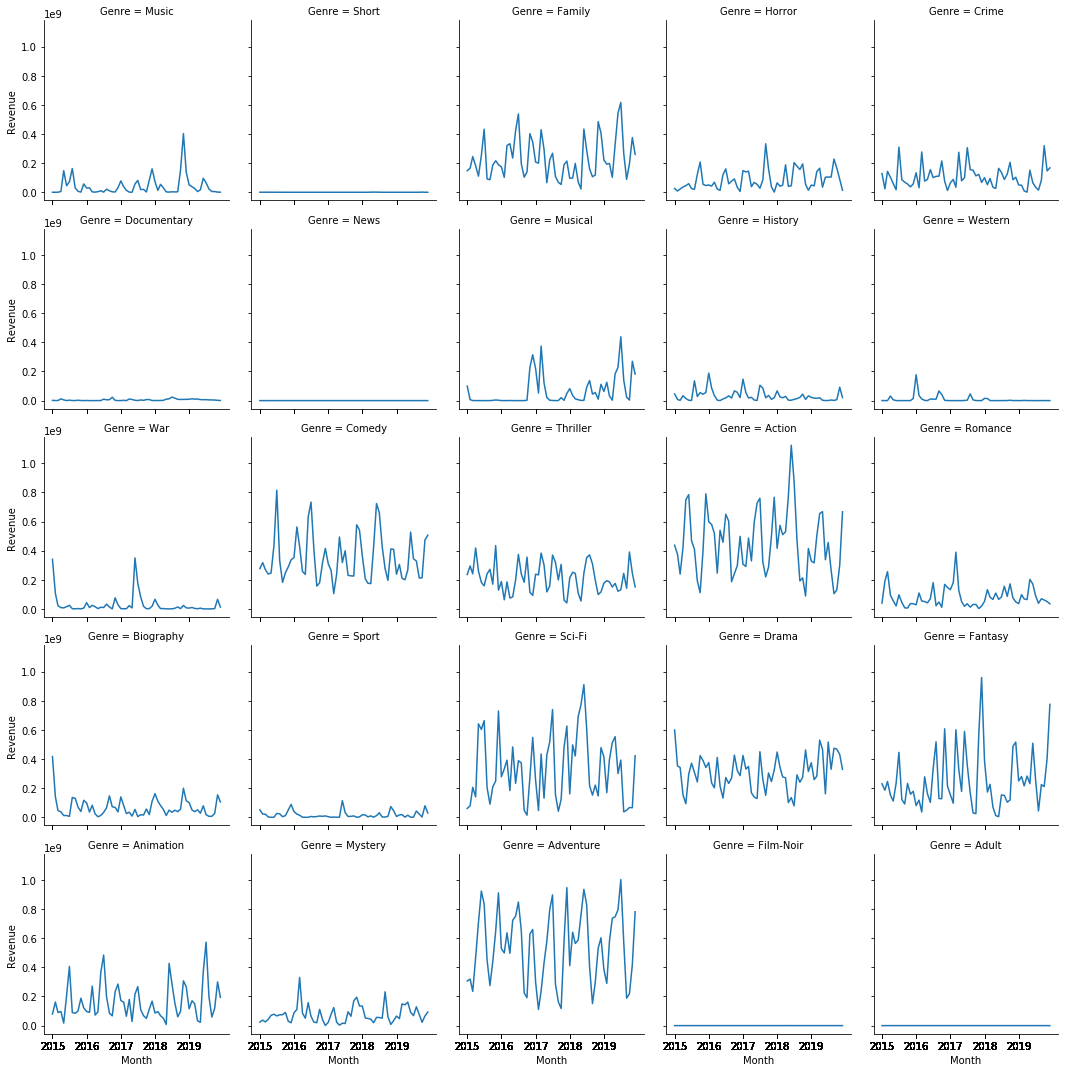

In [47]:
# create new data frame with only movie data to show the monthly revenue trends over time

cf = df[['Month', 'Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult']]

# melt data so the genre is categorical variable and revenue is the value 
cf = pd.melt(cf, id_vars=['Month'], value_vars=['Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult'],
        var_name='Genre', value_name='Revenue')



g = sns.FacetGrid(cf, col="Genre", col_wrap=5, size=3, height=2)
g.map(sns.lineplot, "Month", "Revenue", )
g.set(xticks=cf.Month[0::12])


/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


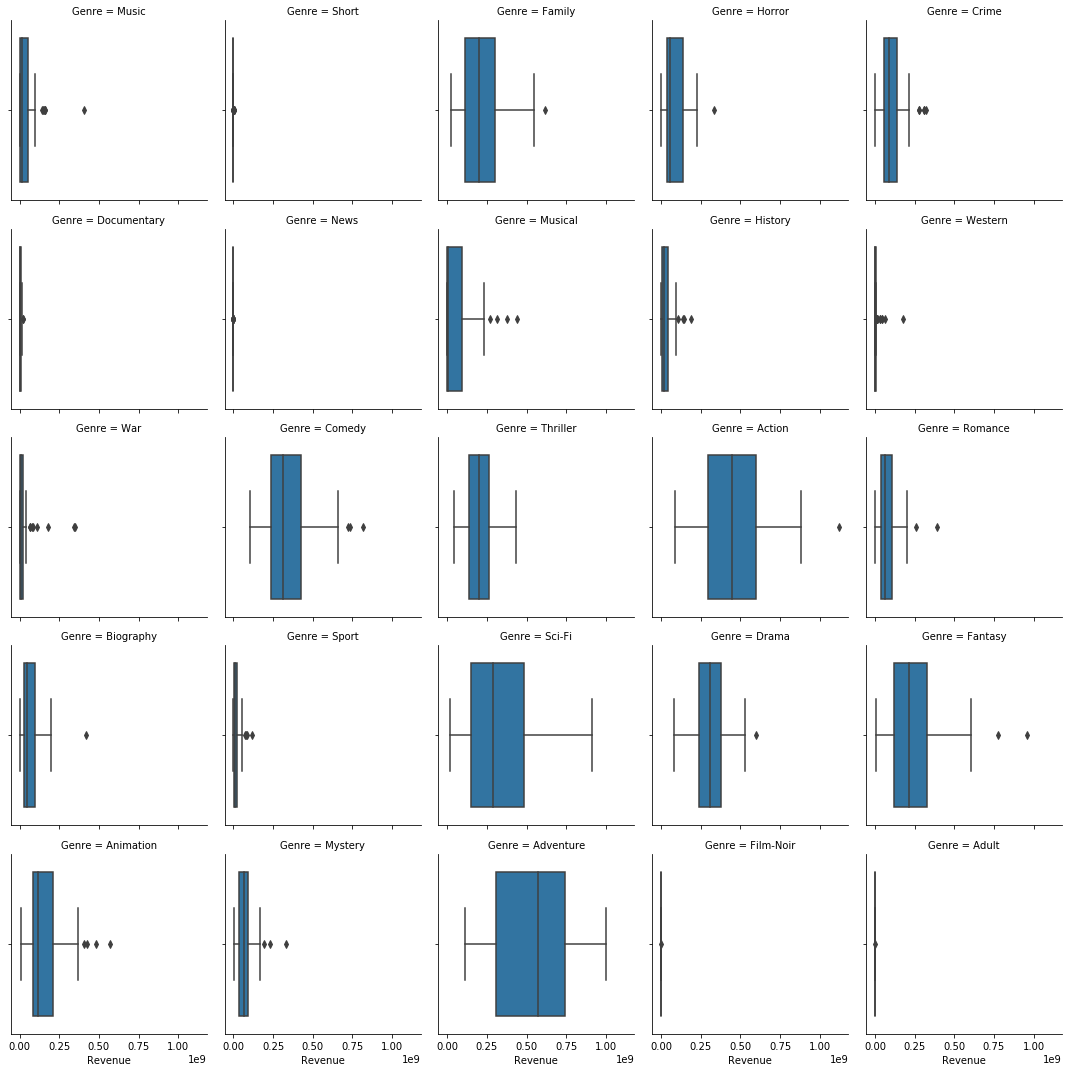

In [48]:
# plot box plots to check for major outliers
g = sns.FacetGrid(cf, col="Genre", col_wrap=5, size=3, height=2)
g.map(sns.boxplot, "Revenue")

/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


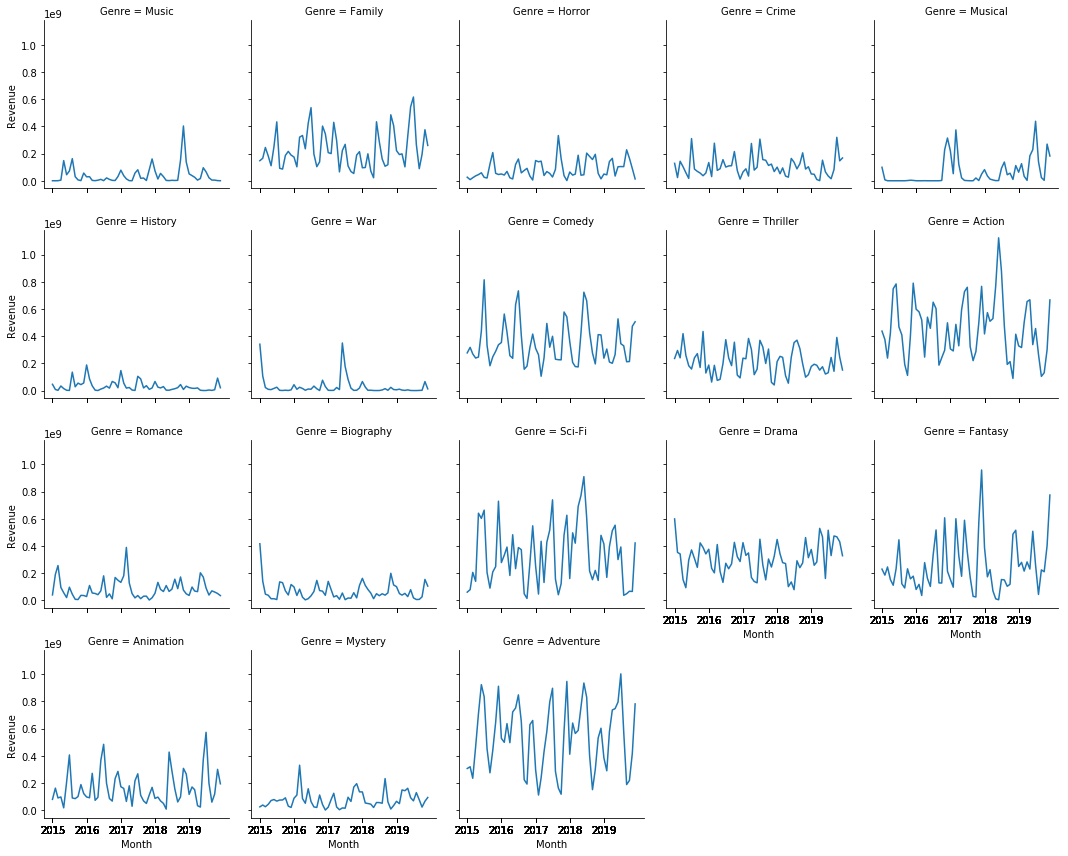

In [49]:
# here is a nother example, just with some of the lower revenue genres removed
cf = df[['Month', 'Music', 'Family', 'Horror', 'Crime',
       'Musical', 'History', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure']]

cf = pd.melt(cf, id_vars=['Month'], value_vars=['Music', 'Family', 'Horror', 'Crime',
       'Musical', 'History', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure'],var_name='Genre', value_name='Revenue')


g = sns.FacetGrid(cf, col="Genre", col_wrap=5, size=3, height=2)
g.map(sns.lineplot, "Month", "Revenue", )
g.set(xticks=cf.Month[0::12])

/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


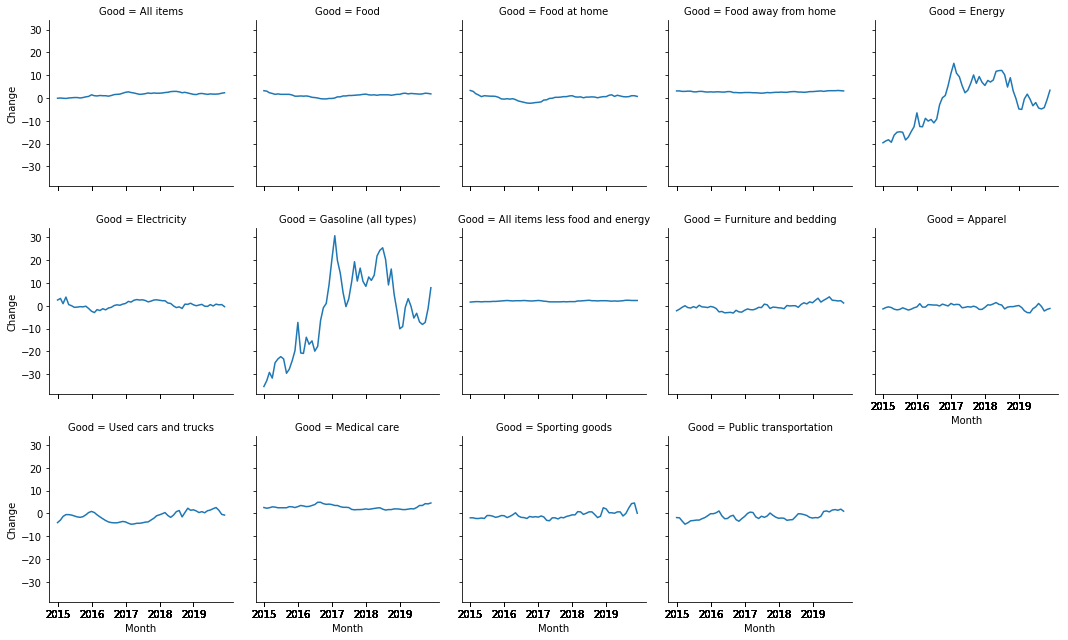

In [50]:
# now do the same witht the price data only
cf = df[['Month', 'All items', 'Food', 'Food at home', 'Food away from home',
       'Energy', 'Electricity', 'Gasoline (all types)',
       'All items less food and energy', 'Furniture and bedding', 'Apparel',
       'Used cars and trucks', 'Medical care', 'Sporting goods',
       'Public transportation']]

cf = pd.melt(cf, id_vars=['Month'], value_vars=['All items', 'Food', 'Food at home', 'Food away from home',
       'Energy', 'Electricity', 'Gasoline (all types)',
       'All items less food and energy', 'Furniture and bedding', 'Apparel',
       'Used cars and trucks', 'Medical care', 'Sporting goods',
       'Public transportation'],
        var_name='Good', value_name='Change')



g = sns.FacetGrid(cf, col="Good", col_wrap=5, size=3, height=2)
g.map(sns.lineplot, "Month", "Change")
g.set(xticks=cf.Month[0::12]);

/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


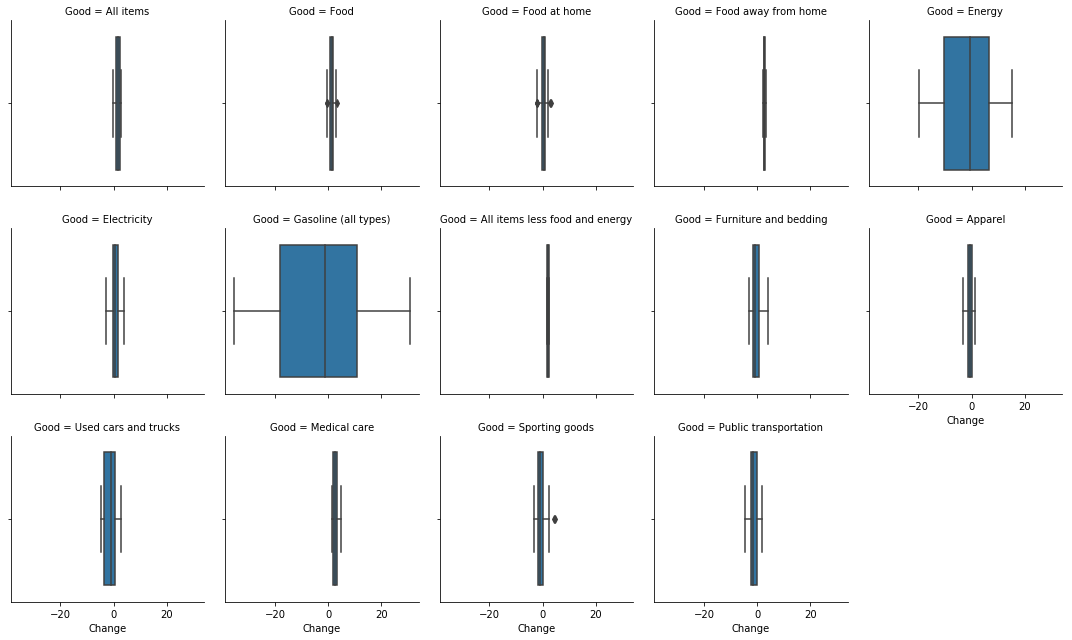

In [51]:
# boxplots the price data only
g = sns.FacetGrid(cf, col="Good", col_wrap=5, size=3, height=2)
g.map(sns.boxplot, "Change")

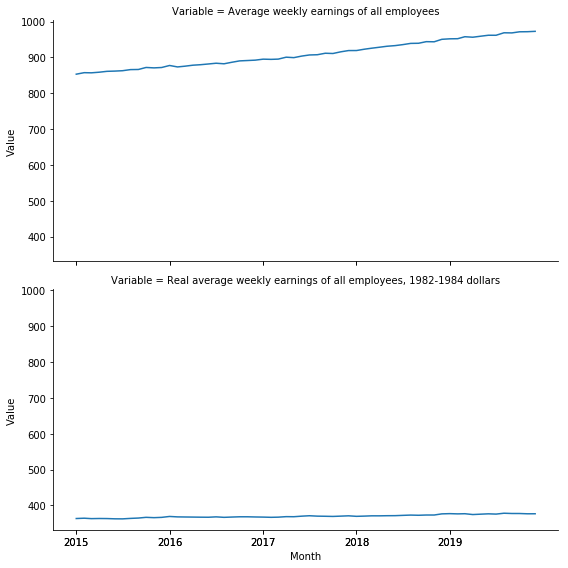

In [52]:
# trend data for weekly earnings part 1
cf = df[['Month', 'Average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars']]

cf = pd.melt(cf, id_vars=['Month'], value_vars=['Average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars'],
        var_name='Variable', value_name='Value')



g = sns.FacetGrid(cf, row="Variable", height=4, aspect=2)
g.map(sns.lineplot, "Month", "Value")
g.set(xticks=cf.Month[0::12]);

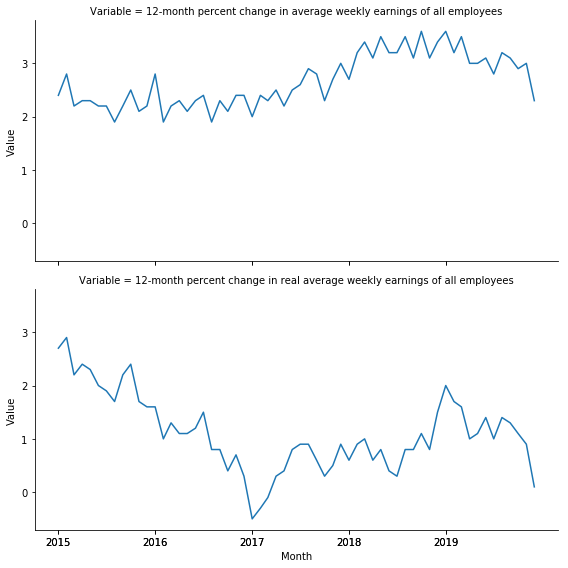

In [53]:
# trend data for weekly earnings part 1 (percentages)
cf = df[['Month', '12-month percent change in average weekly earnings of all employees',
       '12-month percent change in real average weekly earnings of all employees']]

cf = pd.melt(cf, id_vars=['Month'], value_vars=['12-month percent change in average weekly earnings of all employees',
       '12-month percent change in real average weekly earnings of all employees'],
        var_name='Variable', value_name='Value')



g = sns.FacetGrid(cf, row="Variable", height=4, aspect=2)
g.map(sns.lineplot, "Month", "Value")
g.set(xticks=cf.Month[0::12]);

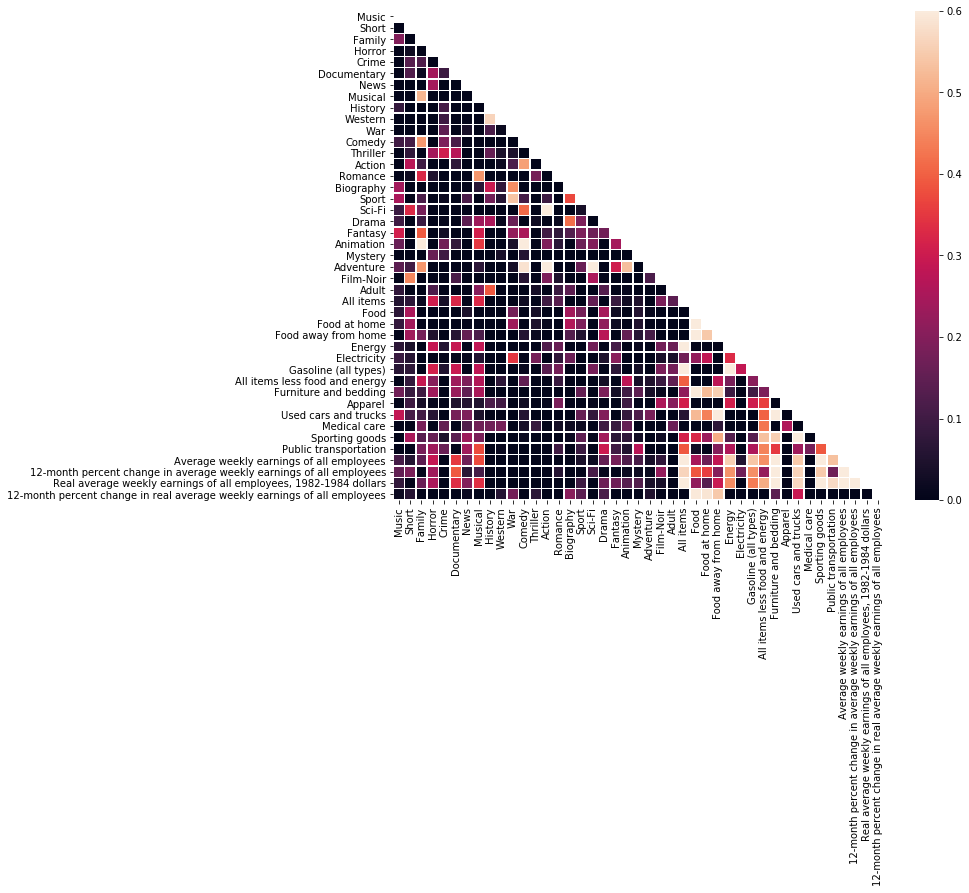

In [54]:
# Compute the correlation matrix
corr = df.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))


sns.heatmap(corr, mask=mask, vmin=0, vmax=.6,
            linewidths=.5);

In [55]:
# import sm for OLS regression 
import statsmodels.api as sm

In [56]:
# create a new dataframe with all data to be used in backwards stepwise regression
with open('alldat.pkl', "rb") as fh:
  af = pickle.load(fh)

df = af[['Month', 'Crime', 'Drama', 'Thriller', 'Animation', 'Action', 'Horror', 'Documentary',
         'Musical',  'All items', 'Food', 'Food at home', 'Energy',  
         'Gasoline (all types)', 'Public transportation', 'Average weekly earnings of all employees']]
df.columns

Index(['Month', 'Crime', 'Drama', 'Thriller', 'Animation', 'Action', 'Horror',
       'Documentary', 'Musical', 'All items', 'Food', 'Food at home', 'Energy',
       'Gasoline (all types)', 'Public transportation',
       'Average weekly earnings of all employees'],
      dtype='object')

In [57]:
def stepwise(x_in, x_col, y_out, y_col):
    for val in y_col:
        xval = x_in.copy()
        xcols = x_col.copy()
        max_aic = 10000000000.0
        while True:
            X = sm.add_constant(xval)
            y = y_out[val]

            f = sm.OLS(y, X).fit()
            model = f.summary()
            aic = f.aic

            if len(f.pvalues) == 1:
                break
                
            max_value = max(f.pvalues[1:])
            maxindex = list(f.pvalues).index(max_value)-1

            if aic < max_aic and max_value > 0.05:
                xval = xval.drop(columns=[xcols[maxindex]])
                xcols = xcols[0:maxindex]+xcols[maxindex+1:]


            elif aic < max_aic and max_value <= 0.05:
                print('\n\nfinal model:')
                print(model)
                break


            else:
                print('\n\nfinal model:')
                print(model)
                break

In [58]:
x = af[['Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult']]

xs = ['Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult']


y = af[['All items',
       'Food', 'Food at home', 'Food away from home', 'Energy', 'Electricity',
       'Gasoline (all types)', 'All items less food and energy',
       'Furniture and bedding', 'Apparel', 'Used cars and trucks',
       'Medical care', 'Sporting goods', 'Public transportation',
       'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees']]


ys = ['All items',
       'Food', 'Food at home', 'Food away from home', 'Energy', 'Electricity',
       'Gasoline (all types)', 'All items less food and energy',
       'Furniture and bedding', 'Apparel', 'Used cars and trucks',
       'Medical care', 'Sporting goods', 'Public transportation',
       'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees']

                

stepwise(x,xs,y,ys)
# stepwise(y,ys,x,xs)



final model:
                            OLS Regression Results                            
Dep. Variable:                  Music   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     7.283
Date:                Mon, 16 Aug 2021   Prob (F-statistic):            0.00152
Time:                        19:10:24   Log-Likelihood:                -1157.1
No. Observations:                  60   AIC:                             2320.
Df Residuals:                      57   BIC:                             2327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const            



final model:
                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.642
Date:                Mon, 16 Aug 2021   Prob (F-statistic):             0.0581
Time:                        19:10:24   Log-Likelihood:                -1169.4
No. Observations:                  60   AIC:                             2347.
Df Residuals:                      56   BIC:                             2355.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              



final model:
                            OLS Regression Results                            
Dep. Variable:                Western   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     6.313
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           0.000296
Time:                        19:10:26   Log-Likelihood:                -1096.9
No. Observations:                  60   AIC:                             2204.
Df Residuals:                      55   BIC:                             2214.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------



final model:
                            OLS Regression Results                            
Dep. Variable:                Romance   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.873
Date:                Mon, 16 Aug 2021   Prob (F-statistic):              0.114
Time:                        19:10:27   Log-Likelihood:                -1163.9
No. Observations:                  60   AIC:                             2340.
Df Residuals:                      54   BIC:                             2352.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------



final model:
                            OLS Regression Results                            
Dep. Variable:                  Drama   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     6.402
Date:                Mon, 16 Aug 2021   Prob (F-statistic):            0.00310
Time:                        19:10:28   Log-Likelihood:                -1193.8
No. Observations:                  60   AIC:                             2394.
Df Residuals:                      57   BIC:                             2400.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const          



final model:
                            OLS Regression Results                            
Dep. Variable:              Film-Noir   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.097
Date:                Mon, 16 Aug 2021   Prob (F-statistic):             0.0476
Time:                        19:10:29   Log-Likelihood:                -716.38
No. Observations:                  60   AIC:                             1437.
Df Residuals:                      58   BIC:                             1441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.043e+04   5559.491     

In [59]:
# modules for VAR
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [60]:
# first we do grangers causation matrix to see which variables to consider in model

from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df



# create a new df to use for grangers test
test = df.copy()
test.set_index('Month', inplace=True)

# generate the causation matrix
gcm = grangers_causation_matrix(test, variables = test.columns)


In [61]:
# save causation matrix
gcm.to_csv('gcm.csv')

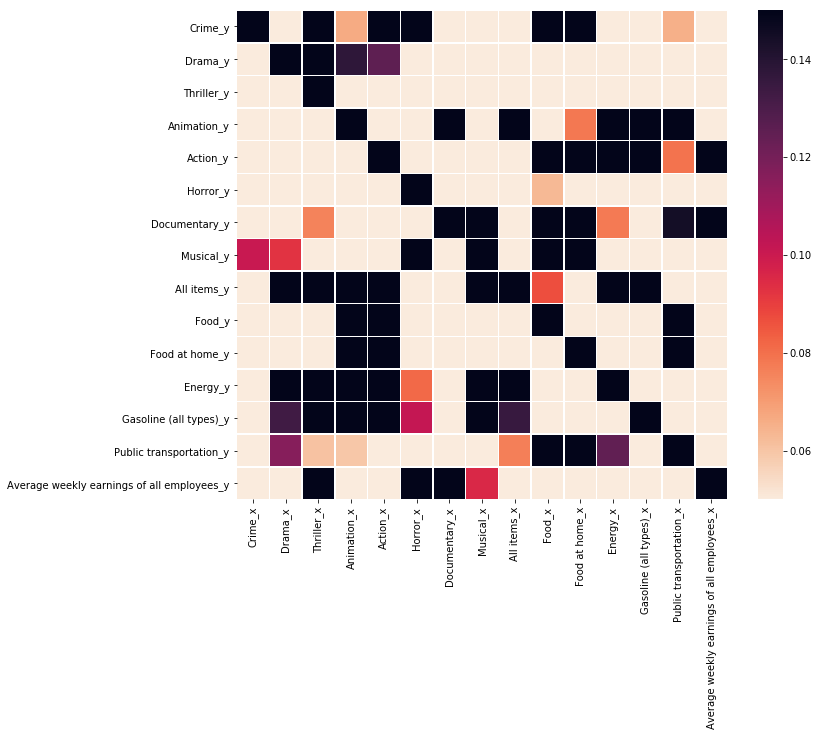

In [62]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(gcm, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


sns.heatmap(gcm, vmin=0.05, vmax=.15,cmap=sns.cm.rocket_r,
            linewidths=.5);

# here we want to look for lightest cells (p <0.05)

In [63]:
# next do cointegration test is to confirm which to keep

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

        
test = df.reset_index()
test = test.drop(columns=['Month', 'index', 'Musical', 'Documentary'])
test
cointegration_test(test)

# want to choose variable where value is True

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Crime  ::  nan       > nan       =>   False
Drama  ::  nan       > 311.1288  =>   False
Thriller ::  3114.85   > 263.2603  =>   True
Animation ::  2337.32   > 219.4051  =>   True
Action ::  1764.75   > 179.5199  =>   True
Horror ::  1326.27   > 143.6691  =>   True
All items ::  904.82    > 111.7797  =>   True
Food   ::  595.57    > 83.9383   =>   True
Food at home ::  387.18    > 60.0627   =>   True
Energy ::  196.65    > 40.1749   =>   True
Gasoline (all types) ::  94.71     > 24.2761   =>   True
Public transportation ::  32.88     > 12.3212   =>   True
Average weekly earnings of all employees ::  1.61      > 4.1296    =>   False


/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/vecm.py:579: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  category=HypothesisTestWarning)
/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/vecm.py:650: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/vecm.py:652: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1-a[i])


In [64]:
#generate our raw data set which is the variables from above that were "True"
raw = df.set_index('Month')
raw = raw[['Thriller', 'Animation', 'Action', 'Horror', 'All items', 
             'Food', 'Food at home', 'Energy', 'Gasoline (all types)', 'Public transportation']]
raw

,Thriller,Animation,Action,Horror,All items,Food,Food at home,Energy,Gasoline (all types),Public transportation
Month,,,,,,,,,,
2015-01-01,236170777,79476683,437648575,26149007,-0.1,3.2,3.3,-19.6,-35.4,-1.8
2015-02-01,295058851,162163710,375663060,8478090,0.0,3.0,2.9,-18.8,-32.8,-1.9
2015-03-01,240864736,89926719,239011408,22254918,-0.1,2.3,1.9,-18.3,-29.2,-3.3
2015-04-01,418681880,97270366,424271339,36005673,-0.2,2.0,1.3,-19.4,-31.7,-4.7
2015-05-01,260164543,17094382,749052069,45282366,0.0,1.6,0.6,-16.3,-25.0,-4.1
2015-06-01,182684741,205738057,784637762,58912266,0.1,1.8,1.0,-15.0,-23.3,-3.2
2015-07-01,158478527,406283840,468455544,25313337,0.2,1.6,0.9,-14.8,-22.3,-3.1
2015-08-01,240530827,89830056,409916346,20310243,0.2,1.6,0.8,-15.0,-23.3,-2.9
2015-09-01,271770710,84884969,193027262,122913338,0.0,1.6,0.8,-18.4,-29.6,-2.9


In [65]:
# split into test/train sets

split = int(round(0.7*(len(raw)), 0))
split

train = raw[0:split]
test = raw[split:]

In [66]:
# adfuller test for stationary series

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [67]:
# in this case, when i used the training data one of the series was non-stiationary, so I differenced once and then it worked
diff = train.diff().dropna()

for name, column in diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Thriller" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.9879
 No. Lags Chosen       = 4
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Animation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9454
 No. Lags Chosen       = 10
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.0403. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Action" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Le

In [68]:
# test different VAR model order sizes to see which has the best accuracy (based on AIC)
model = VAR(diff)
for i in range(1,10):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print()

Lag Order = 1
AIC :  139.86880167103948
BIC :  144.51322016985281

Lag Order = 2
AIC :  139.74973386229888
BIC :  148.70737349530467

Lag Order = 3
AIC :  59.42506063878281
BIC :  72.78431615234017

Lag Order = 4
AIC :  -153.93241404875195
BIC :  -136.0817020437754

Lag Order = 5
AIC :  -171.8514072966885
BIC :  -149.41822233522697

Lag Order = 6
AIC :  -166.5039358328257
BIC :  -139.39644104686735

Lag Order = 7
AIC :  -191.71980283515234
BIC :  -159.84580364463838

Lag Order = 8
AIC :  -232.34545806385168
BIC :  -195.61299973694716

Lag Order = 9
AIC :  -463.3743756902327
BIC :  -421.69251095436545



/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [77]:
# best accuracy at 3, show model summary
fitted = model.fit(3)
fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 16, Aug, 2021
Time:                     19:21:44
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    72.7843
Nobs:                     38.0000    HQIC:                   64.1782
Log likelihood:          -1358.27    FPE:                4.56698e+28
AIC:                      59.4251    Det(Omega_mle):     1.17330e+26
--------------------------------------------------------------------
Results for equation Thriller
                                 coefficient        std. error           t-stat            prob
-----------------------------------------------------------------------------------------------
const                        -5351800.301818   22149314.363719           -0.242           0.809
L1.Thriller                        -0.486860          0.199702           -2.438           0.0

In [ ]:
# perform durbin watson test to make sure there isn't major collinearity between residuals

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted.resid)

for col, val in zip(diff.columns, out):
    print(col, ':', round(val, 2))

In [70]:
# take the most recent 3 observations from training data to fit forecast

lo = fitted.k_ar

forecast_in = diff.values[-lo:]
forecast_in

array([[-1.34708847e+08, -1.85165530e+07,  1.95774590e+07,
         1.39130238e+08,  1.00000000e-01,  1.00000000e-01,
         1.00000000e-01,  9.00000000e-01,  2.30000000e+00,
        -9.00000000e-01],
       [-5.56339300e+07, -4.19362890e+07,  2.42842736e+08,
        -1.47194584e+08,  3.00000000e-01, -2.00000000e-01,
        -4.00000000e-01,  3.80000000e+00,  8.40000000e+00,
         2.00000000e-01],
       [ 1.91268950e+08,  4.19453861e+08,  3.51337453e+08,
         3.40244500e+06,  1.00000000e-01,  2.00000000e-01,
         3.00000000e-01,  3.00000000e-01,  2.50000000e+00,
         1.00000000e-01]])

In [71]:
# forecast the last 30% of data to compare with test data
s = len(raw) - split
fc = fitted.forecast(y=forecast_in, steps=s)
df_forecast = pd.DataFrame(fc, index=raw.index[split:], columns=raw.columns + '_1d')
df_forecast.round(2)

,Thriller_1d,Animation_1d,Action_1d,Horror_1d,All items_1d,Food_1d,Food at home_1d,Energy_1d,Gasoline (all types)_1d,Public transportation_1d
Month,,,,,,,,,,
2018-07-01,1.647114e+07,-1.759026e+08,-3.063323e+08,8.626381e+07,0.21,-0.25,-0.46,1.94,3.47,1.30
2018-08-01,8.176754e+07,-2.469582e+08,-1.908865e+08,7.096615e+07,0.39,0.13,0.04,3.89,7.88,0.92
2018-09-01,-2.773561e+08,-1.404043e+08,1.387751e+08,-5.291431e+07,-0.62,-0.04,0.03,-7.79,-17.35,-0.12
2018-10-01,2.302841e+08,4.392089e+08,2.441073e+07,-9.130673e+07,0.25,-0.04,-0.07,4.00,6.91,-1.29
2018-11-01,-1.892517e+08,-1.092600e+08,3.938535e+08,-1.192350e+08,-0.19,-0.14,-0.11,-2.26,-5.20,-0.99
2018-12-01,6.375160e+07,-2.122902e+07,-1.249763e+08,1.538572e+08,0.37,-0.05,-0.19,2.91,7.35,-0.35
2019-01-01,7.528669e+07,-1.336562e+08,-3.522980e+08,1.038614e+08,0.31,-0.05,-0.02,4.40,9.34,1.76
2019-02-01,1.590692e+08,1.436141e+08,1.110993e+08,-6.841319e+07,-0.06,0.01,-0.00,-0.70,-1.85,0.27
2019-03-01,-3.125798e+08,-1.061793e+08,4.553458e+06,7.356537e+06,0.29,-0.05,-0.05,2.67,4.96,0.13


In [79]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

# invert results to get final values
df_results = invert_transformation(diff, df_forecast, second_diff=False)        
df_results

,Thriller_1d,Animation_1d,Action_1d,Horror_1d,All items_1d,Food_1d,Food at home_1d,Energy_1d,Gasoline (all types)_1d,Public transportation_1d,Thriller_forecast,Animation_forecast,Action_forecast,Horror_forecast,All items_forecast,Food_forecast,Food at home_forecast,Energy_forecast,Gasoline (all types)_forecast,Public transportation_forecast
Month,,,,,,,,,,,,,,,,,,,,
2018-07-01,1.647114e+07,-1.759026e+08,-3.063323e+08,8.626381e+07,0.210910,-0.249035,-0.455415,1.941273,3.472164,1.304202,2.077401e+08,2.435513e+08,4.500514e+07,8.966626e+07,0.310910,-0.049035,-0.155415,2.241273,5.972164,1.404202
2018-08-01,8.176754e+07,-2.469582e+08,-1.908865e+08,7.096615e+07,0.386542,0.128418,0.042154,3.893723,7.882212,0.915761,2.895076e+08,-3.406981e+06,-1.458813e+08,1.606324e+08,0.697452,0.079383,-0.113261,6.134997,13.854376,2.319963
2018-09-01,-2.773561e+08,-1.404043e+08,1.387751e+08,-5.291431e+07,-0.616775,-0.035683,0.033399,-7.789914,-17.350095,-0.122702,1.215151e+07,-1.438113e+08,-7.106201e+06,1.077181e+08,0.080677,0.043701,-0.079862,-1.654917,-3.495719,2.197261
2018-10-01,2.302841e+08,4.392089e+08,2.441073e+07,-9.130673e+07,0.251476,-0.036930,-0.068137,3.998457,6.914825,-1.293943,2.424356e+08,2.953976e+08,1.730453e+07,1.641136e+07,0.332153,0.006771,-0.147998,2.343540,3.419106,0.903318
2018-11-01,-1.892517e+08,-1.092600e+08,3.938535e+08,-1.192350e+08,-0.186949,-0.137554,-0.106739,-2.259344,-5.196796,-0.987945,5.318385e+07,1.861377e+08,4.111581e+08,-1.028236e+08,0.145204,-0.130783,-0.254738,0.084196,-1.777690,-0.084627
2018-12-01,6.375160e+07,-2.122902e+07,-1.249763e+08,1.538572e+08,0.367021,-0.050629,-0.193309,2.907805,7.348130,-0.345845,1.169355e+08,1.649086e+08,2.861818e+08,5.103363e+07,0.512224,-0.181413,-0.448046,2.992001,5.570440,-0.430472
2019-01-01,7.528669e+07,-1.336562e+08,-3.522980e+08,1.038614e+08,0.308957,-0.050815,-0.024086,4.398343,9.340362,1.757851,1.922222e+08,3.125246e+07,-6.611616e+07,1.548950e+08,0.821181,-0.232228,-0.472132,7.390344,14.910802,1.327379
2019-02-01,1.590692e+08,1.436141e+08,1.110993e+08,-6.841319e+07,-0.064308,0.006597,-0.003317,-0.704297,-1.851360,0.266474,3.512914e+08,1.748666e+08,4.498317e+07,8.648186e+07,0.756873,-0.225631,-0.475448,6.686047,13.059442,1.593853
2019-03-01,-3.125798e+08,-1.061793e+08,4.553458e+06,7.356537e+06,0.291978,-0.045248,-0.048963,2.666718,4.959695,0.129243,3.871160e+07,6.868729e+07,4.953663e+07,9.383839e+07,1.048851,-0.270880,-0.524411,9.352765,18.019137,1.723096


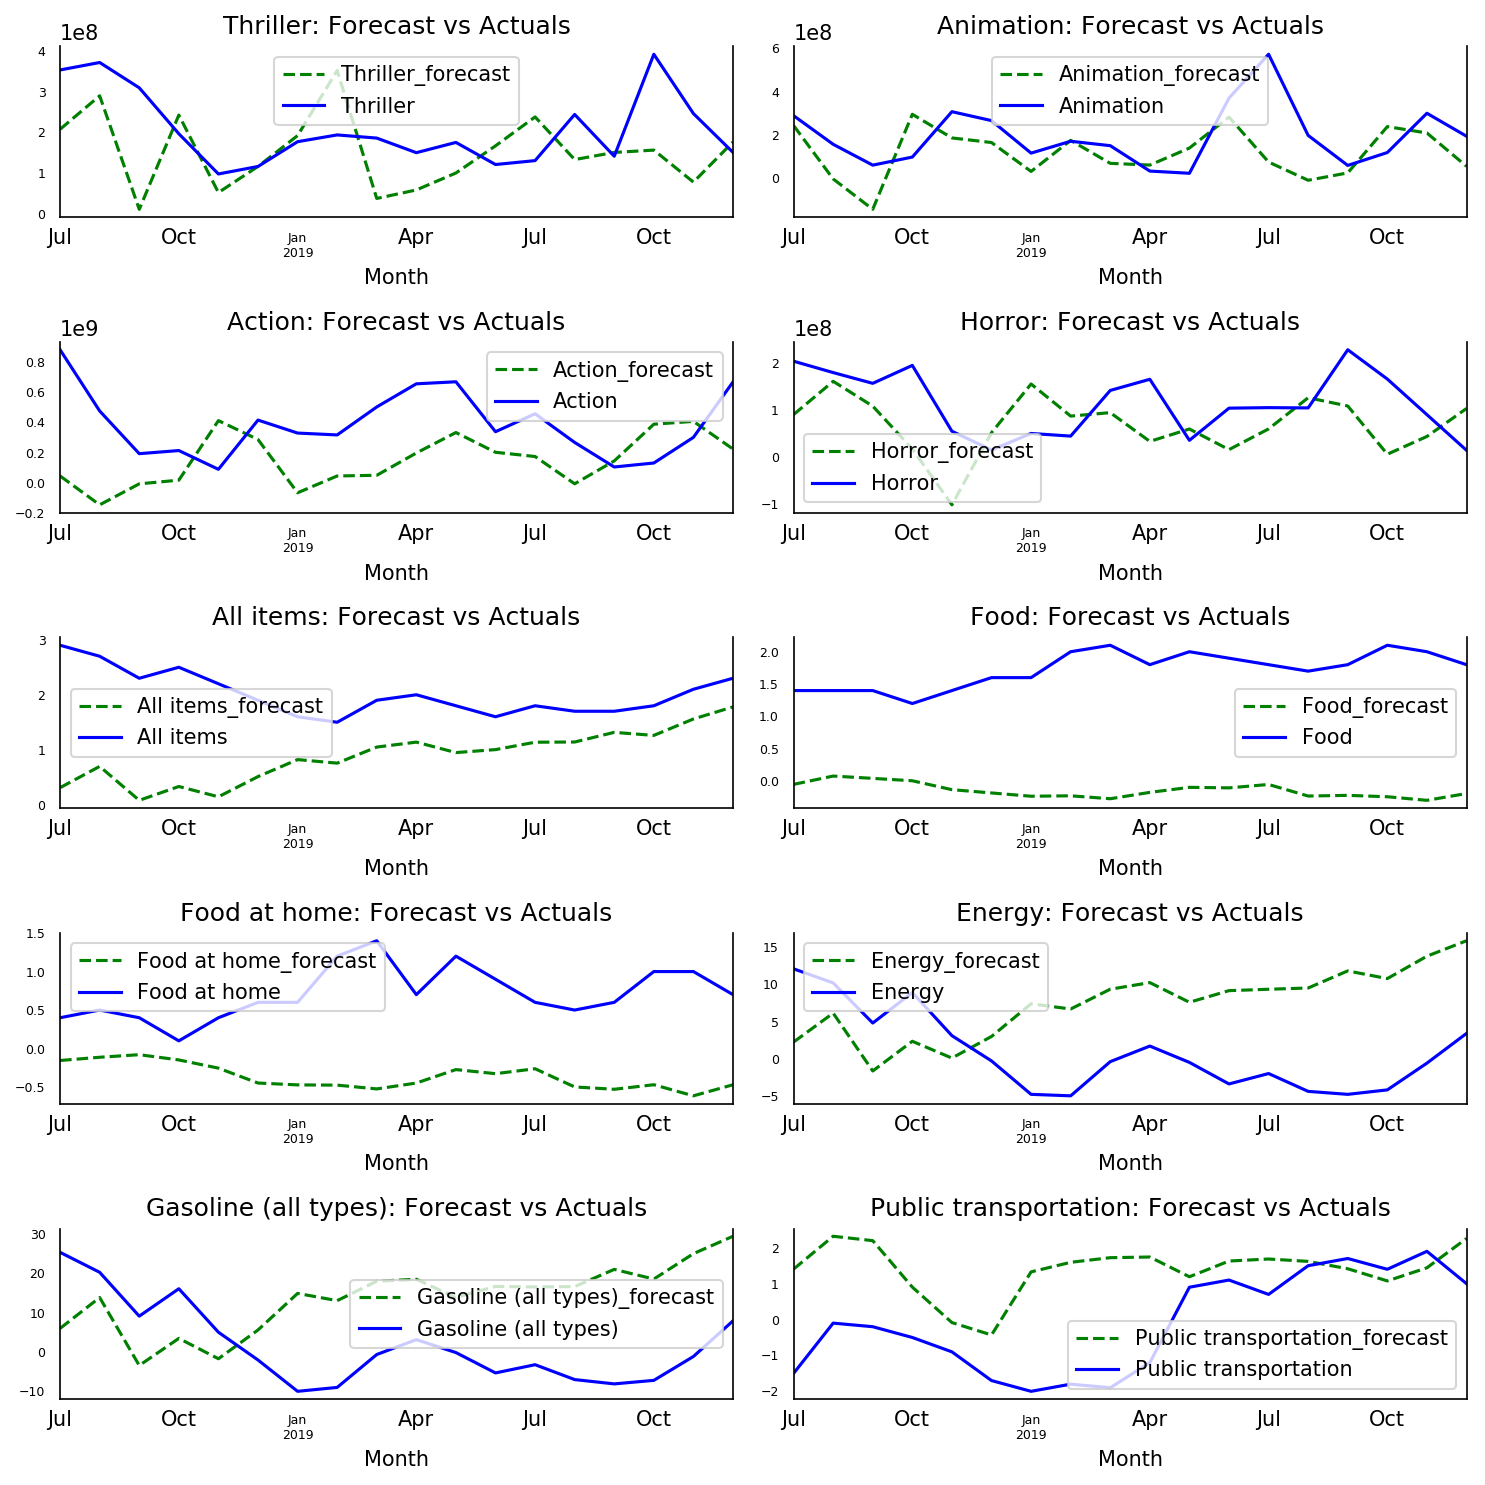

In [74]:
# plot predicted vs actual

fig, axes = plt.subplots(nrows=int(len(raw.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(raw.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(color='g', linestyle='dashed', legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][:].plot(color='b', legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [78]:
# function to display forecast accuracy for each variable

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})


cols = list(test.columns)

for col in cols:
    print(f'\nForecast Accuracy of: {col}')
    accuracy_prod = forecast_accuracy(df_results[col+'_forecast'].values, test[col])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))



Forecast Accuracy of: Thriller
mape :  0.4531
me :  -54912505.544
mae :  99918898.5713
mpe :  -0.1696
rmse :  126867868.4802
corr :  0.1627
minmax :  0.4025

Forecast Accuracy of: Animation
mape :  1.0769
me :  -77241371.2537
mae :  129007018.9202
mpe :  -0.0751
rmse :  167247076.1267
corr :  0.3019
minmax :  0.7143

Forecast Accuracy of: Action
mape :  0.984
me :  -239045911.715
mae :  319566085.2884
mpe :  -0.2823
rmse :  371622875.7809
corr :  -0.1082
minmax :  0.7433

Forecast Accuracy of: Horror
mape :  1.2489
me :  -46487527.509
mae :  82057313.8209
mpe :  0.2231
rmse :  96423106.2608
corr :  0.1191
minmax :  0.699

Forecast Accuracy of: All items
mape :  0.5302
me :  -1.1283
mae :  1.1283
mpe :  -0.5302
rmse :  1.3322
corr :  -0.3937
minmax :  0.5302

Forecast Accuracy of: Food
mape :  1.0769
me :  -1.8642
mae :  1.8642
mpe :  -1.0769
rmse :  1.897
corr :  -0.6942
minmax :  1.0769

Forecast Accuracy of: Food at home
mape :  1.5856
me :  -1.0758
mae :  1.0758
mpe :  -1.5856
rmse

/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/mnt/c/Users/Austin/Documents/DU/COMP 4447/toolsenv/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
